In [22]:
import warnings
warnings.filterwarnings('ignore')


In [23]:
# Dependencies
import pytz
import datetime as dt
from datetime import datetime
import dateparser
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint 
from scipy.stats import linregress
import scipy.stats as stats
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from suntime import Sun, SunTimeException
import os
import json
import urllib.request

In [24]:
accident_data_to_load = "../Resources/US_Accidents_May19.csv"
accidents_data_df = pd.read_csv(accident_data_to_load)

# Visualize
accidents_data_df = accidents_data_df.reset_index()
accidents_data_df.set_index('ID', inplace=True)
accidents_data_df.head()

,index,State,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,0,OH,3,2/8/16 5:46,2/8/16 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,29.68,10.0,Calm,NaN,0.02,Light Rain,False,Night,Night,Night
A-2,1,OH,2,2/8/16 6:07,2/8/16 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,...,29.65,10.0,Calm,NaN,0.00,Light Rain,False,Night,Night,Day
A-3,2,OH,2,2/8/16 6:49,2/8/16 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,...,29.67,10.0,SW,3.5,NaN,Overcast,True,Night,Night,Day
A-4,3,OH,3,2/8/16 7:23,2/8/16 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,...,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,Night,Day,Day
A-5,4,OH,2,2/8/16 7:39,2/8/16 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,...,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,True,Day,Day,Day


In [25]:
#extracting the accident date
accidents_data_df['Accident_Date'] = accidents_data_df['Start_Time'].str.split(" ", n = 1, expand = True)[0]
accidents_data_df.head()

,index,State,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Astronomical_Twilight,Accident_Date
ID,,,,,,,,,,,,,,,,,,,,,
A-1,0,OH,3,2/8/16 5:46,2/8/16 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,10.0,Calm,NaN,0.02,Light Rain,False,Night,Night,Night,2/8/16
A-2,1,OH,2,2/8/16 6:07,2/8/16 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,...,10.0,Calm,NaN,0.00,Light Rain,False,Night,Night,Day,2/8/16
A-3,2,OH,2,2/8/16 6:49,2/8/16 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,...,10.0,SW,3.5,NaN,Overcast,True,Night,Night,Day,2/8/16
A-4,3,OH,3,2/8/16 7:23,2/8/16 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,...,9.0,SW,4.6,NaN,Mostly Cloudy,False,Night,Day,Day,2/8/16
A-5,4,OH,2,2/8/16 7:39,2/8/16 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,...,6.0,SW,3.5,NaN,Mostly Cloudy,True,Day,Day,Day,2/8/16


In [26]:
#Converting date from string format to date format
accidents_data_df['Accident_Date'] = pd.to_datetime(accidents_data_df['Accident_Date'])
#accidents_data_df['Accident_Date_No_Time'] = accidents_data_df['Accident_Date'].dt.date
#accidents_data_df = accidents_data_df.drop(['Accident_Date'], axis=1)
accidents_data_df.head()

,index,State,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Astronomical_Twilight,Accident_Date
ID,,,,,,,,,,,,,,,,,,,,,
A-1,0,OH,3,2/8/16 5:46,2/8/16 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,10.0,Calm,NaN,0.02,Light Rain,False,Night,Night,Night,2016-02-08
A-2,1,OH,2,2/8/16 6:07,2/8/16 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,...,10.0,Calm,NaN,0.00,Light Rain,False,Night,Night,Day,2016-02-08
A-3,2,OH,2,2/8/16 6:49,2/8/16 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,...,10.0,SW,3.5,NaN,Overcast,True,Night,Night,Day,2016-02-08
A-4,3,OH,3,2/8/16 7:23,2/8/16 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,...,9.0,SW,4.6,NaN,Mostly Cloudy,False,Night,Day,Day,2016-02-08
A-5,4,OH,2,2/8/16 7:39,2/8/16 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,...,6.0,SW,3.5,NaN,Mostly Cloudy,True,Day,Day,Day,2016-02-08


In [29]:
accidents_data_df['Day_Of_Week'] = accidents_data_df['Accident_Date'].dt.day_name()
accidents_data_df.head()

,index,State,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Astronomical_Twilight,Accident_Date,Day_Of_Week
ID,,,,,,,,,,,,,,,,,,,,,
A-1,0,OH,3,2/8/16 5:46,2/8/16 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,Calm,NaN,0.02,Light Rain,False,Night,Night,Night,2016-02-08,Monday
A-2,1,OH,2,2/8/16 6:07,2/8/16 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,...,Calm,NaN,0.00,Light Rain,False,Night,Night,Day,2016-02-08,Monday
A-3,2,OH,2,2/8/16 6:49,2/8/16 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,...,SW,3.5,NaN,Overcast,True,Night,Night,Day,2016-02-08,Monday
A-4,3,OH,3,2/8/16 7:23,2/8/16 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,...,SW,4.6,NaN,Mostly Cloudy,False,Night,Day,Day,2016-02-08,Monday
A-5,4,OH,2,2/8/16 7:39,2/8/16 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,...,SW,3.5,NaN,Mostly Cloudy,True,Day,Day,Day,2016-02-08,Monday


In [31]:
accidents_data_df['Week_Number'] = accidents_data_df['Accident_Date'].dt.dayofweek
accidents_data_df.head()

,index,State,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Astronomical_Twilight,Accident_Date,Day_Of_Week,Week_Number
ID,,,,,,,,,,,,,,,,,,,,,
A-1,0,OH,3,2/8/16 5:46,2/8/16 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,NaN,0.02,Light Rain,False,Night,Night,Night,2016-02-08,Monday,0
A-2,1,OH,2,2/8/16 6:07,2/8/16 6:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,...,NaN,0.00,Light Rain,False,Night,Night,Day,2016-02-08,Monday,0
A-3,2,OH,2,2/8/16 6:49,2/8/16 7:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,...,3.5,NaN,Overcast,True,Night,Night,Day,2016-02-08,Monday,0
A-4,3,OH,3,2/8/16 7:23,2/8/16 7:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,...,4.6,NaN,Mostly Cloudy,False,Night,Day,Day,2016-02-08,Monday,0
A-5,4,OH,2,2/8/16 7:39,2/8/16 8:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,...,3.5,NaN,Mostly Cloudy,True,Day,Day,Day,2016-02-08,Monday,0


In [34]:
# Using GroupBy in order to separate the data into fields according to "Day of Week" values
grouped_accident_df = accidents_data_df.groupby(['Week_Number'])


# In order to be visualized, a data function must be used...
grouped_accident_df['State'].count()

Week_Number
0    179395
1    188822
2    189637
3    185494
4    189610
5     62401
6     53216
Name: State, dtype: int64

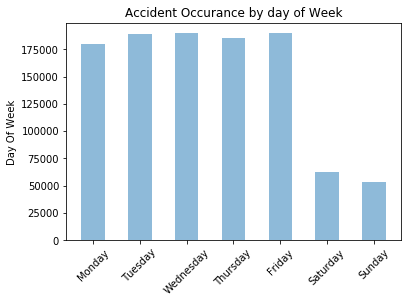

In [42]:
objects = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(objects))
occurance = grouped_accident_df['State'].count()

plt.bar(y_pos, occurance, align='center', width=.5, alpha=0.5)
plt.xticks(y_pos, objects, rotation=45)
plt.ylabel('Day Of Week')
plt.title('Accident Occurance by day of Week')

plt.show()